# Case Study 1 Part 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_new = pd.read_csv('data_basic.csv')
data_new.head()

,name,item_condition_id,brand_name,price,shipping,item_description,log_price,category_1,category_2,category_3
0,MLB Cincinnati Reds T Shirt Size XL,3,MLB,10.0,1,No description yet,2.397895,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2.397895,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,Unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,3.583519,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,Unknown,44.0,0,Complete with certificate of authenticity,3.806662,Women,Jewelry,Necklaces


In [3]:
data_new.shape

(1482535, 10)

**Taking 70 % of data randomly**

In [4]:
data = data_new.sample(frac =.7)

In [5]:
data.shape

(1037774, 10)

In [6]:
data.isnull().sum()

name                 0
item_condition_id    0
brand_name           0
price                0
shipping             0
item_description     3
log_price            0
category_1           0
category_2           0
category_3           0
dtype: int64

In [7]:
data[data.item_description.isnull()]

,name,item_condition_id,brand_name,price,shipping,item_description,log_price,category_1,category_2,category_3
1224924,Disney Minnie Head band,3,Disney,9.0,0,NaN,2.302585,Women,Women's Accessories,Hair Accessories
861230,Lipgloss,4,Unknown,49.0,0,NaN,3.912023,Beauty,Makeup,Lips
511535,Shoes for Michelle,4,Unknown,9.0,0,NaN,2.302585,Kids,Girls 0-24 Mos,Shoes


In [8]:
data.dropna(inplace=True)
data.isnull().sum()

name                 0
item_condition_id    0
brand_name           0
price                0
shipping             0
item_description     0
log_price            0
category_1           0
category_2           0
category_3           0
dtype: int64

### Bivariate and Multivariate Analysis with some advanced data preprocessing

#### Top 10 expensive brands by Category_1

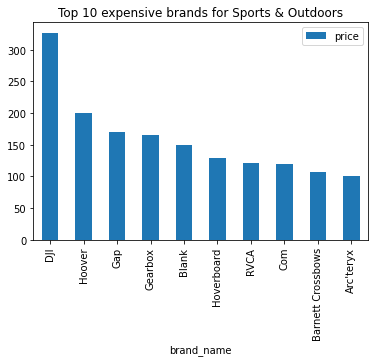

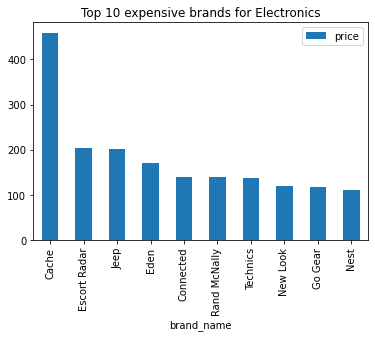

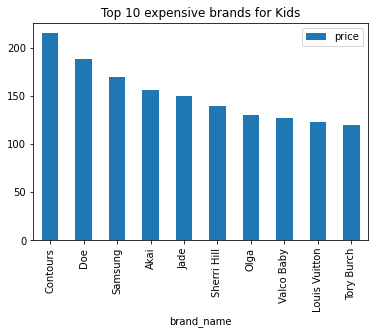

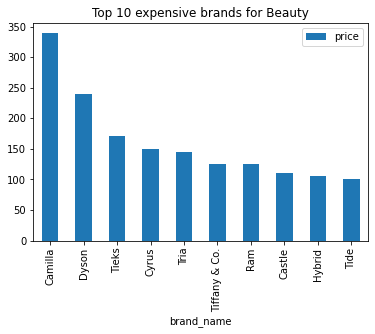

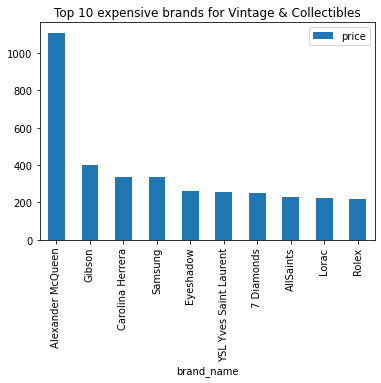

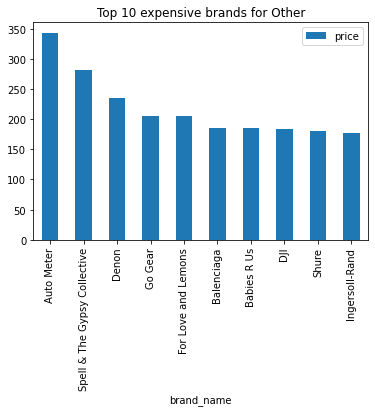

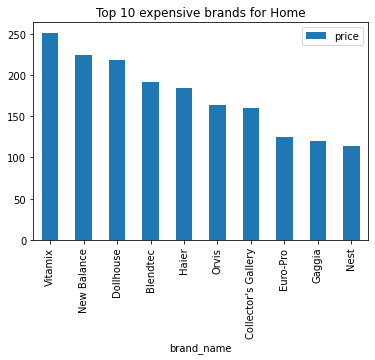

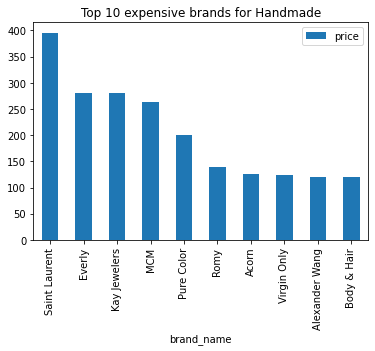

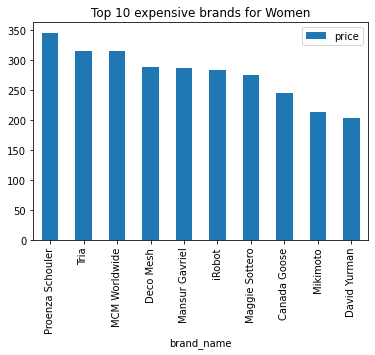

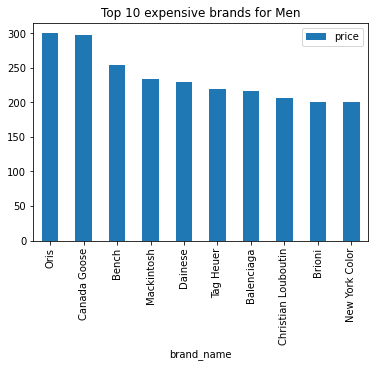

In [9]:
for cat in set(data.category_1.values):
    data.loc[data.category_1 == cat, ['brand_name','price']].groupby('brand_name').median().sort_values(by='price',ascending = False)[:10].plot(kind='bar');
    plt.title('Top 10 expensive brands for {}'.format(cat));
    plt.show()

So we can see there is a variation of brand and price with category_1

#### Analyzing category_1 with price

In [10]:
data[['category_1','price']].groupby('category_1').median().sort_values(by='price',ascending = False)

,price
category_1,
Men,21.0
Women,19.0
Home,18.0
Sports & Outdoors,16.0
Vintage & Collectibles,16.0
Beauty,15.0
Electronics,15.0
Kids,14.0
Other,14.0


As we can see that the price of the Mens' products are high, followed by Womens' and Home

**Analyzing category_2 with Price**

In [11]:
## Taking top 15
data[['category_2','price']].groupby('category_2').median().sort_values(by='price',ascending = False)[:15]

,price
category_2,
Cameras & Photography,40.0
Computers & Tablets,40.0
Strollers,36.0
Musical instruments,31.0
Women's Handbags,31.0
Suits,30.0
Shoes,29.0
Footwear,28.0
Bags and Purses,27.0


As we can see that the camera andphotography related products' price is high, followed by computer and tablets.

#### Analyzing category_1 with shipping

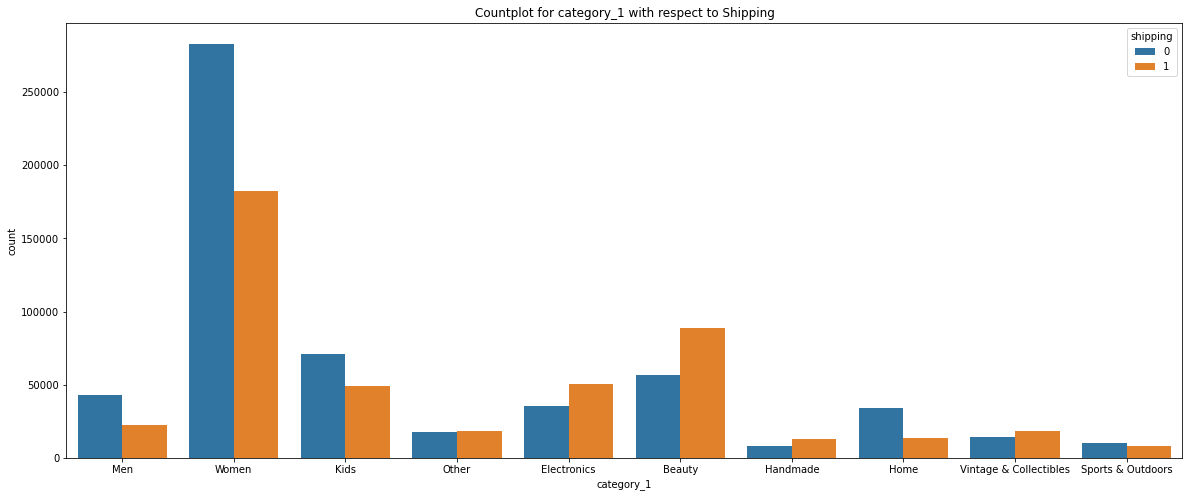

In [12]:
plt.figure(figsize=(20,8));
sns.countplot(data.category_1, hue=data.shipping);
plt.title('Countplot for category_1 with respect to Shipping');
plt.show()

Here we can see lot of variation in shipping for each category_1

- For Home, Men, Kids and Women related products, more number of buyers give delivery charges.
- While in case of Electronics and Beauty products, more number of sellers are paying the delivery charges

#### Analyzing category_1 with item_condition_id

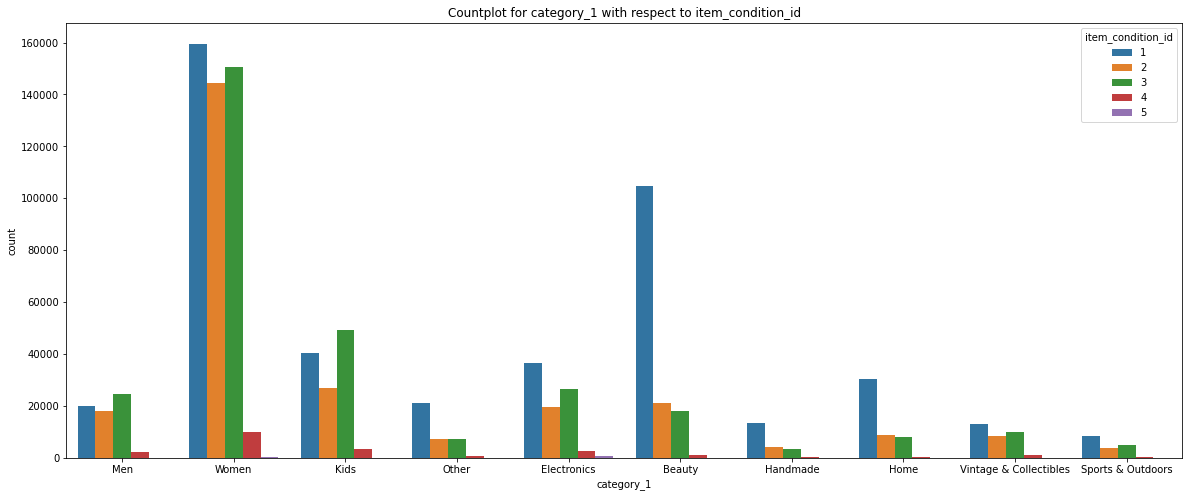

In [13]:
plt.figure(figsize=(20,8));
sns.countplot(data.category_1, hue=data.item_condition_id);
plt.title('Countplot for category_1 with respect to item_condition_id');
plt.show()

- For Electronic, Home, Other and Beauty related products, Most of the products' item condition is very good, that is 1.
- In Women category most of the products' condition is good, very few item_condition = 4 and 5 are present.
- As a whole for all the products, the product condition is good. Very few item_condition = 4 & 5 are present

**Analysing item_condition_id with shipping**

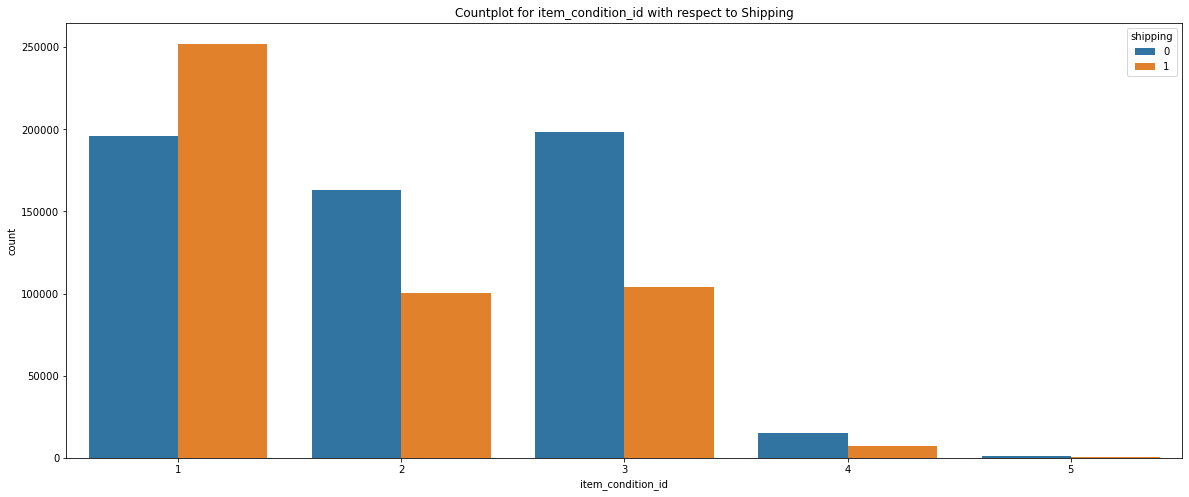

In [14]:
plt.figure(figsize=(20,8));
sns.countplot(data.item_condition_id, hue=data.shipping);
plt.title('Countplot for item_condition_id with respect to Shipping');
plt.show()

As we can see from the above graph,

- Only for item condition id 1, shipping charges for more number of products are paid by sellers
- For other item condition ids, shipping charges for more number of products are paid by Buyers

**Analysing Brand name with item condition id**

In [15]:
d = data.groupby('brand_name').median().sort_values(by='price',ascending = False)
top_20_brand_name = d.index[:20]
bottom_20_brand_name = d.index[-20:]

In [16]:
top_20_brand_name

Index(['Proenza Schouler', 'Auto Meter', 'Oris', 'Mansur Gavriel',
       'Maggie Sottero', 'Canada Goose', 'Dainese', 'Mikimoto', 'Vitamix',
       'David Yurman', 'Escort Radar', 'Stephen Webster', 'MICHELE', 'Brioni',
       'Blendtec', 'Mackintosh', 'Thom Browne', 'Ingersoll-Rand',
       'Alexander Wang', 'Dessy Collection'],
      dtype='object', name='brand_name')

In [17]:
bottom_20_brand_name

Index(['Briefly Stated', 'Kiss My Face', 'Giftcraft', 'Berkley', 'Krush',
       'Tee Shop', 'Agetec', 'Sephora Favorites', 'AA Aquarium', 'Feetures!',
       'Play MG', 'Twilight Gypsy Collective', 'Revlon Colorsilk', 'Genica',
       'Old Glory', 'Kae Argatherapie', 'A.B.S. by Allen Schwartz',
       'Pedialyte', 'Urban Up', 'CM Style Fashion'],
      dtype='object', name='brand_name')

--------------------------------------Item Condition For Top 20 Brands----------------------------------------------------


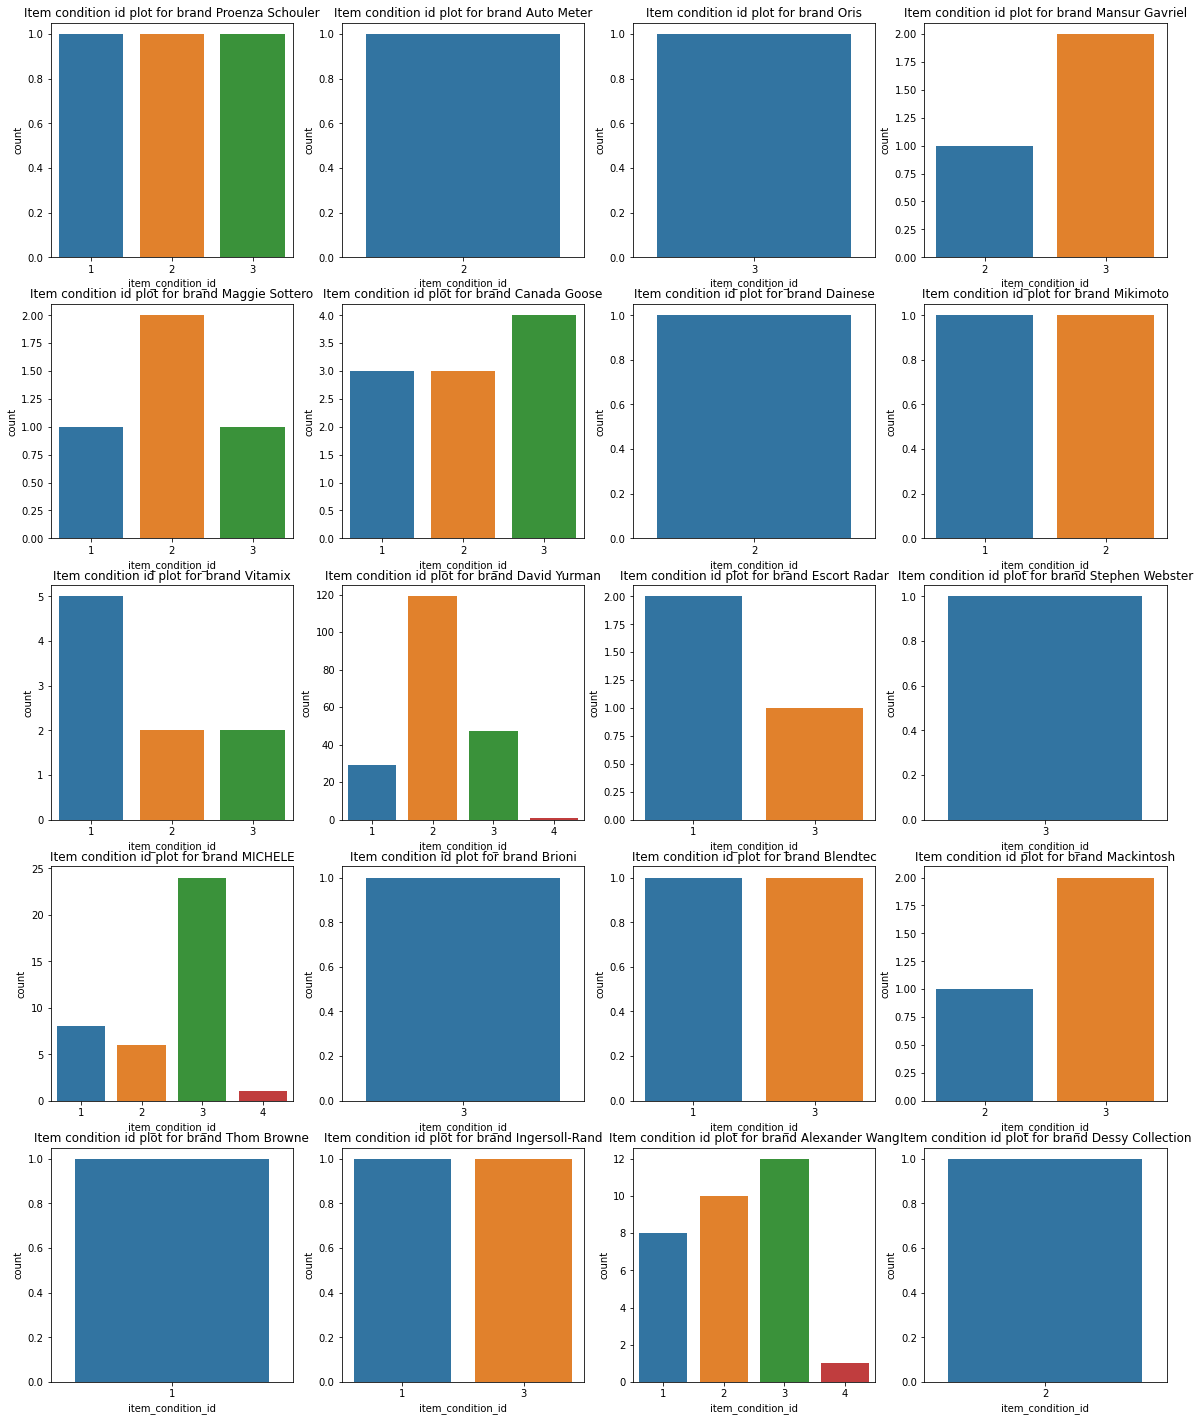

In [18]:
a=0
print('--------------------------------------Item Condition For Top 20 Brands----------------------------------------------------')
plt.figure(figsize=(20,25))
for i in top_20_brand_name:
    a+=1
    plt.subplot(5,4,a)
    sns.countplot(data.loc[data.brand_name == i,'item_condition_id']);
    plt.title('Item condition id plot for brand {}'.format(i));

#plt.title('Item Condition for top20 brands');
plt.show()   

--------------------------------------Item Condition For bottom 20 Brands----------------------------------------------------


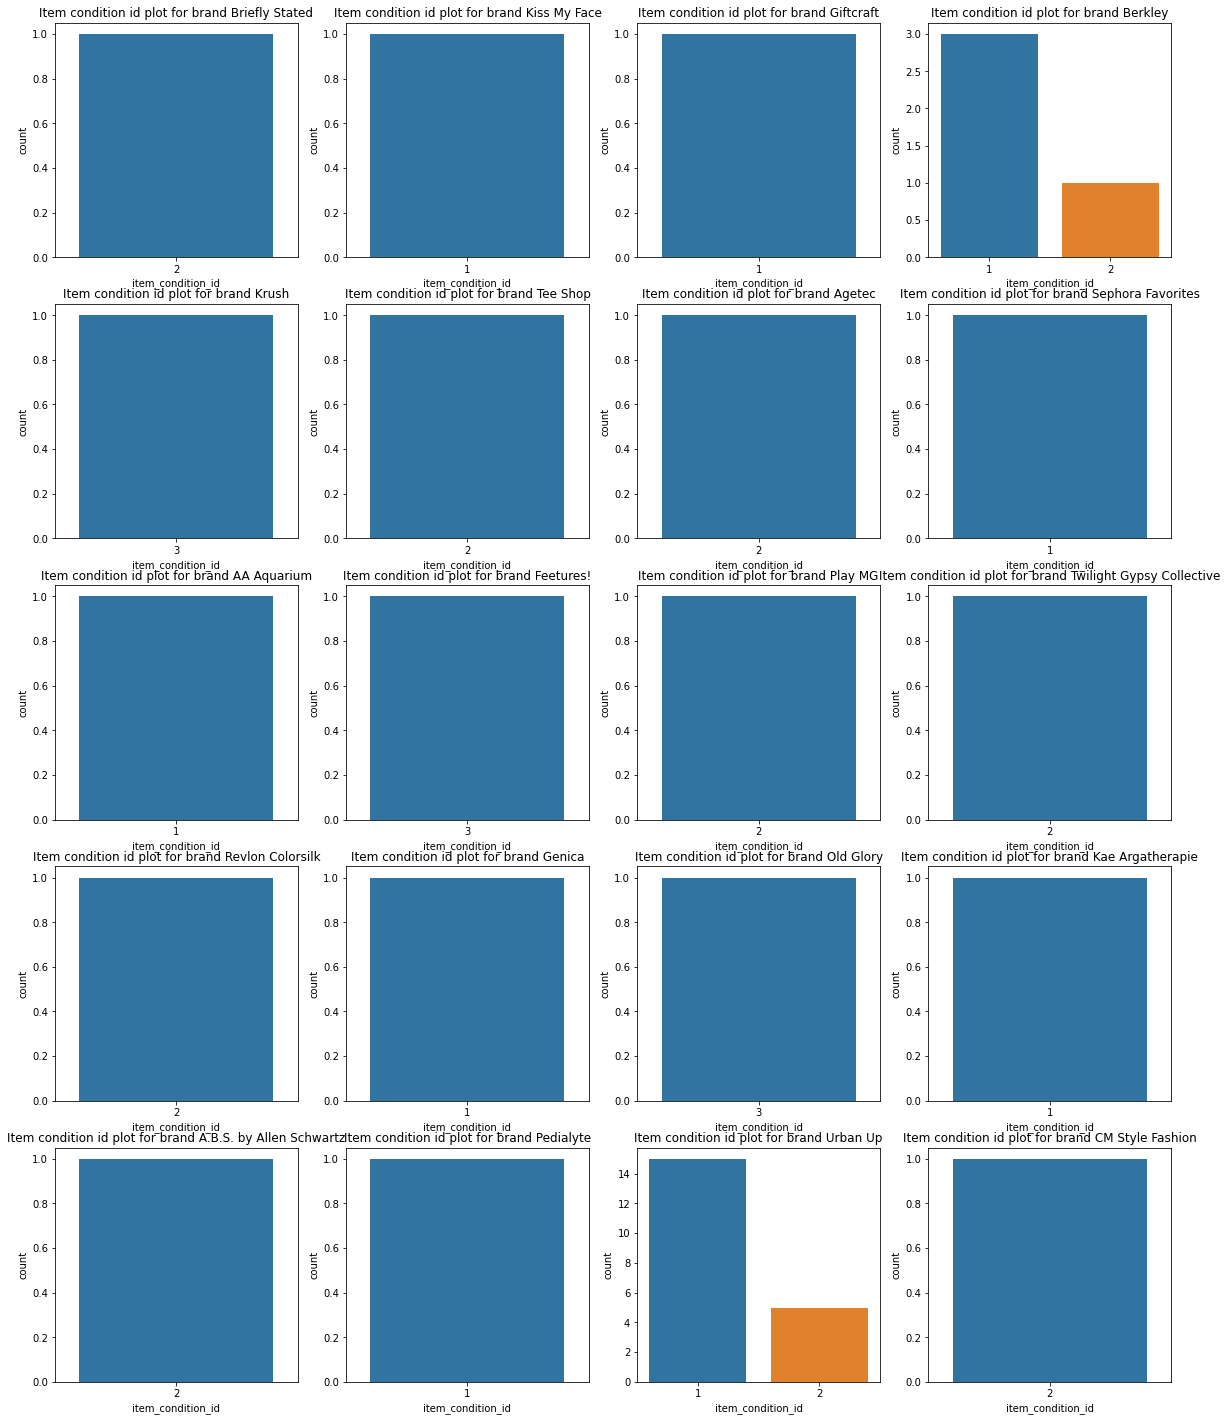

In [19]:

a=0
print('--------------------------------------Item Condition For bottom 20 Brands----------------------------------------------------')
plt.figure(figsize=(20,25))
for i in bottom_20_brand_name:
    a+=1
    plt.subplot(5,4,a)
    sns.countplot(data.loc[data.brand_name == i,'item_condition_id']);
    plt.title('Item condition id plot for brand {}'.format(i));

#plt.title('Item Condition for top20 brands');
plt.show()   

As a conclusion, we can see that,

- there is no such variabilty in item condition id for the top 20 brand and the bottom 20 brand as per the price.


#### Correlation with features

**Lets see the correlation between the item_condition_id with price**

Since item condition id has 5 values (1,2,3,4,5), we can use anova testing for correlation

In [20]:
#Ref: https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1

from scipy import stats

F, p = stats.f_oneway(data[data.item_condition_id==1].price,
                      data[data.item_condition_id==2].price,
                      data[data.item_condition_id==3].price,
                      data[data.item_condition_id==4].price,
                      data[data.item_condition_id==5].price)
print('Anova test statistics value for price with respect to item_condition_id is  {} '.format(F))

F, p = stats.f_oneway(data[data.item_condition_id==1].log_price,
                      data[data.item_condition_id==2].log_price,
                      data[data.item_condition_id==3].log_price,
                      data[data.item_condition_id==4].log_price,
                      data[data.item_condition_id==5].log_price)
print('Anova test statistics value for log_price with respect to item_condition_id is {} '.format(F))



Anova test statistics value for price with respect to item_condition_id is  66.97113150388935 
Anova test statistics value for log_price with respect to item_condition_id is 148.99906628458828 


**As we know, more the value of statistics, more will be the correleation (i.e., More variabilty in means among different groups)**

- Here the statistics value for the price is less than that of log_price
- So we can get some correlation information from log price and item condition id

**Lets see the correlation between shipping and price**

Since shipping has only two values, we can easily get the correlation from pearson correlation

Ref: https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1

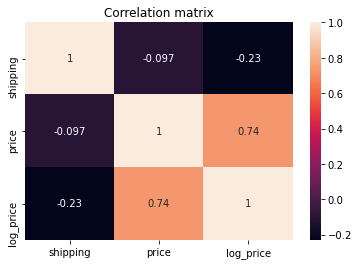

In [21]:
sns.heatmap(data[['shipping','price','log_price']].corr(),annot=True);
plt.title('Correlation matrix');
plt.show()

As we can see, Correlation between price and shipping is very less, but with log price, there is some correlation. So we can go with the log price as it gives more information than normal price

### Text data Preprocessing

#### Text Preprocessing for Name, Brand,Category_2, category_3 and Item_description

Here we define some functions which remove regular expressions, stopwords, html tags etc. and aslo expand the contracted words

In [22]:
import re


def basic_process_for_cat_and_brand(text):
    
    ''' Basic Preprocessing for Category and brand_name'''
    
    string = str(text)
    string = string.replace('&','')
    string = string.replace('-',' ')
    string = string.replace('\'s','')
    
   
    
    # Removing non alphanumeric charecters
    string = re.sub('[^A-Za-z0-9é]+',' ',string)
    string = '_'.join(string.split())
    
    return string


def decontract_text(text):
    string = str(text)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"\'m", " am", string)
    return string

def remove_stopwords(text):
    StopWords = stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
                "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
                'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
                'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
                'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
                'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
                'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
                'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
                'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
                'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
                's', 't', 'can', 'will', 'just', 'don', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
                've', 'y']
    string = str(text).lower()
    string = string.replace('\\r', ' ')
    string = string.replace('\\n', ' ')
    string = string.replace('\\t',' ')
    string = string.replace('\\"', ' ')
    string = re.sub('[^A-Za-z0-9]+', ' ', string)
    string = decontract_text(string)
    sentence = []
    for word in string.split():
        if word not in StopWords:
            sentence.append(word)
    return ' '.join(sentence)
        
    

**Name**

In [23]:
data.name[-10:]

1134129     Sisterhood of the Traveling Pants 1&2
403538       NWT B&BW PUMPKIN NIGHTLIGHT DIFFUSER
1420517       New Portable Charger Set for iPhone
1447996                         Wall mount for TV
209069                                   Nike air
1138907               Black leggings from Express
1222758                 Alli weight loss capsules
1112466    American Eagle jeans -slim boot size 8
1430438            Primitive burlap stocking nwot
184016                         Ray-Ban Clubmaster
Name: name, dtype: object

In [24]:
data['name'] = data.name.apply(remove_stopwords)

In [25]:
data.name[-10:]

1134129           sisterhood traveling pants 1 2
403538      nwt b bw pumpkin nightlight diffuser
1420517          new portable charger set iphone
1447996                            wall mount tv
209069                                  nike air
1138907                   black leggings express
1222758                alli weight loss capsules
1112466    american eagle jeans slim boot size 8
1430438           primitive burlap stocking nwot
184016                        ray ban clubmaster
Name: name, dtype: object

**Brand_Name**

In [26]:
data.brand_name[-10:]

1134129              Unknown
403538     Bath & Body Works
1420517              Samsung
1447996              Cheetah
209069                  Nike
1138907              Express
1222758              Unknown
1112466       American Eagle
1430438            Primitive
184016               Ray-Ban
Name: brand_name, dtype: object

In [27]:
data['brand_name'] = data.brand_name.apply(basic_process_for_cat_and_brand)

In [28]:
data.brand_name[-10:]

1134129            Unknown
403538     Bath_Body_Works
1420517            Samsung
1447996            Cheetah
209069                Nike
1138907            Express
1222758            Unknown
1112466     American_Eagle
1430438          Primitive
184016             Ray_Ban
Name: brand_name, dtype: object

**Category_1**

In [29]:
data.category_1.unique()

array(['Men', 'Women', 'Kids', 'Other', 'Electronics', 'Beauty',
       'Handmade', 'Home', 'Vintage & Collectibles', 'Sports & Outdoors'],
      dtype=object)

In [30]:
data['category_1'] = data.category_1.apply(basic_process_for_cat_and_brand)

In [31]:
data.category_1.unique()

array(['Men', 'Women', 'Kids', 'Other', 'Electronics', 'Beauty',
       'Handmade', 'Home', 'Vintage_Collectibles', 'Sports_Outdoors'],
      dtype=object)

**Category_2**

In [32]:
data.category_2[-10:]

1134129                        Media
403538                    Home Décor
1420517    Cell Phones & Accessories
1447996                   Home Décor
209069                         Shoes
1138907             Athletic Apparel
1222758         Daily & Travel items
1112466                        Jeans
1430438                   Home Décor
184016           Women's Accessories
Name: category_2, dtype: object

In [33]:
data['category_2'] = data.category_2.apply(basic_process_for_cat_and_brand)

In [34]:
data.category_2[-10:]

1134129                      Media
403538                  Home_Décor
1420517    Cell_Phones_Accessories
1447996                 Home_Décor
209069                       Shoes
1138907           Athletic_Apparel
1222758         Daily_Travel_items
1112466                      Jeans
1430438                 Home_Décor
184016           Women_Accessories
Name: category_2, dtype: object

**Category_3**

In [35]:
data.category_3[-10:]

1134129                        DVD
403538          Home Décor Accents
1420517          Cables & Adapters
1447996         Home Décor Accents
209069            Fashion Sneakers
1138907    Pants, Tights, Leggings
1222758           Sports Nutrition
1112466               Slim, Skinny
1430438         Home Décor Accents
184016                  Sunglasses
Name: category_3, dtype: object

In [36]:
data['category_3'] = data.category_3.apply(basic_process_for_cat_and_brand)

In [37]:
data.category_3[-10:]

1134129                      DVD
403538        Home_Décor_Accents
1420517          Cables_Adapters
1447996       Home_Décor_Accents
209069          Fashion_Sneakers
1138907    Pants_Tights_Leggings
1222758         Sports_Nutrition
1112466              Slim_Skinny
1430438       Home_Décor_Accents
184016                Sunglasses
Name: category_3, dtype: object

**Item_Description**

In [38]:
for i in data.item_description[10:20]:
    print(i)
    print('--------------------------------------------------------------------------------------------------')

In great condition no flaws
--------------------------------------------------------------------------------------------------
Morphe Brushes 12S Soul Of Summer Palette luxuriates the eyelids in a boost of brown-tinted colours that will perfectly compliment any and every look effortlessly. Presenting a selection of twelve truly divine shades, 12S Soul Of Summer Palette enables you to create a multitude of different styles effortlessly, from a classic smokey eye effect, to a bridal look, with this incredibly convenient and beautiful palette. Natural and sultry looks are guaranteed with this luxurious collection, designed for anyone who loves to be creative and enjoys experimenting with their makeup. Unleash the heat with 12S Soul Of Summer Palette.
--------------------------------------------------------------------------------------------------
Size small. Good condition
--------------------------------------------------------------------------------------------------
Girls sz Christma

In [39]:
data['item_description'] = data.item_description.apply(remove_stopwords)

In [40]:
for i in data.item_description[10:20]:
    print(i)
    print('--------------------------------------------------------------------------------------------------')

great condition no flaws
--------------------------------------------------------------------------------------------------
morphe brushes 12s soul summer palette luxuriates eyelids boost brown tinted colours perfectly compliment every look effortlessly presenting selection twelve truly divine shades 12s soul summer palette enables create multitude different styles effortlessly classic smokey eye effect bridal look incredibly convenient beautiful palette natural sultry looks guaranteed luxurious collection designed anyone loves creative enjoys experimenting makeup unleash heat 12s soul summer palette
--------------------------------------------------------------------------------------------------
size small good condition
--------------------------------------------------------------------------------------------------
girls sz christmas leggings free shipping
--------------------------------------------------------------------------------------------------
femelle size 9 5 comes no b

### Lamitization for Name and Item_description

In [41]:
from nltk.stem import WordNetLemmatizer
lam = WordNetLemmatizer()
def lamitizing(text):
    tokens  = text.split()
    lam_list =[]
    for token in tokens:
        lam_list.append(lam.lemmatize(token))
    return ' '.join(lam_list)
        
    

**Name**

In [42]:
data.name[-10:]

1134129           sisterhood traveling pants 1 2
403538      nwt b bw pumpkin nightlight diffuser
1420517          new portable charger set iphone
1447996                            wall mount tv
209069                                  nike air
1138907                   black leggings express
1222758                alli weight loss capsules
1112466    american eagle jeans slim boot size 8
1430438           primitive burlap stocking nwot
184016                        ray ban clubmaster
Name: name, dtype: object

In [43]:
data['name'] = data.name.apply(lamitizing)

In [44]:
data.name[-10:]

1134129           sisterhood traveling pant 1 2
403538     nwt b bw pumpkin nightlight diffuser
1420517         new portable charger set iphone
1447996                           wall mount tv
209069                                 nike air
1138907                   black legging express
1222758                alli weight loss capsule
1112466    american eagle jean slim boot size 8
1430438          primitive burlap stocking nwot
184016                       ray ban clubmaster
Name: name, dtype: object

**Item_Description**

In [45]:
for i in data.item_description[10:20]:
    print(i)
    print('--------------------------------------------------------------------------------------------------')

great condition no flaws
--------------------------------------------------------------------------------------------------
morphe brushes 12s soul summer palette luxuriates eyelids boost brown tinted colours perfectly compliment every look effortlessly presenting selection twelve truly divine shades 12s soul summer palette enables create multitude different styles effortlessly classic smokey eye effect bridal look incredibly convenient beautiful palette natural sultry looks guaranteed luxurious collection designed anyone loves creative enjoys experimenting makeup unleash heat 12s soul summer palette
--------------------------------------------------------------------------------------------------
size small good condition
--------------------------------------------------------------------------------------------------
girls sz christmas leggings free shipping
--------------------------------------------------------------------------------------------------
femelle size 9 5 comes no b

In [46]:
data['item_description'] = data.item_description.apply(lamitizing)

In [47]:
for i in data.item_description[10:20]:
    print(i)
    print('--------------------------------------------------------------------------------------------------')

great condition no flaw
--------------------------------------------------------------------------------------------------
morphe brush 12 soul summer palette luxuriates eyelid boost brown tinted colour perfectly compliment every look effortlessly presenting selection twelve truly divine shade 12 soul summer palette enables create multitude different style effortlessly classic smokey eye effect bridal look incredibly convenient beautiful palette natural sultry look guaranteed luxurious collection designed anyone love creative enjoys experimenting makeup unleash heat 12 soul summer palette
--------------------------------------------------------------------------------------------------
size small good condition
--------------------------------------------------------------------------------------------------
girl sz christmas legging free shipping
--------------------------------------------------------------------------------------------------
femelle size 9 5 come no box come duffle 

### Final data after all processing

In [48]:
train_data = data.drop(['price'],axis=1)
train_data.head()

,name,item_condition_id,brand_name,shipping,item_description,log_price,category_1,category_2,category_3
87363,rocky goretex camo hiking boot,3,Boots,0,used week husband sniper school dark part pain...,3.465736,Men,Shoes,Boots
1378696,authentic green lens ray ban,3,Ray_Ban,0,authentic tried best get clear pic arm bar mar...,3.806662,Women,Women_Accessories,Sunglasses
1256289,red stripe shirt dress,2,Unknown,1,dress comfy wore doesn fit right anymore no fl...,2.564949,Women,Dresses,Above_Knee_Mini
943049,disney frozen girl 5 6 jacket nice,3,Disney,0,really cute disney frozen jacket rhinestone bu...,2.564949,Kids,Girls_4,Coats_Jackets
550456,introduction kinesiology,3,Unknown,0,used class highlighted part first 3 chapter,3.044522,Other,Books,Education_Teaching


### Train Test split

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data.drop(['log_price'], axis = 1),train_data.log_price,test_size=0.3,random_state = 2)

In [50]:
print('Train data input shape: ',X_train.shape)
print('Test data input shape: ',X_test.shape)
print('Train data target shape: ',y_train.shape)
print('Test data target shape: ',y_test.shape)

Train data input shape:  (726439, 8)
Test data input shape:  (311332, 8)
Train data target shape:  (726439,)
Test data target shape:  (311332,)


### Text Encoding

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
import gensim.downloader

C:\Users\avijit.pyne\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


**Brand Name Encoding**

In [52]:
# Label Encoding
brand_encode_dict = dict(zip(list(X_train.brand_name.unique()), list(range(1,len(X_train.brand_name.unique())+1))))

def brand_name_encode(x):
    #for values which are present in train data, for that it will return its corresponding value from dict
    if x in brand_encode_dict.keys():
        return brand_encode_dict[x]
    # the values which are not present in train data, for that it will return 0
    else:
        return 0
    
X_train['brand_name_encode'] = X_train['brand_name'].apply(brand_name_encode)
X_test['brand_name_encode'] = X_test['brand_name'].apply(brand_name_encode)



In [53]:
X_train.head()

,name,item_condition_id,brand_name,shipping,item_description,category_1,category_2,category_3,brand_name_encode
309614,nested bean sack hungry caterpillar pjs,3,Caterpillar,1,light grey color 3 6m 10 18lbs lightly weighte...,Kids,Boys_0_24_Mos,Other,1
1316971,100 perfect message capsule,1,Free_People,1,free shipping people really loving new ingenio...,Handmade,Paper_Goods,Stationery,2
864374,funko,1,Funko,1,brand new funko denver bronco demarcus ware,Vintage_Collectibles,Toy,Sport,3
1073064,victoria secret pink yoga pant sz,3,PINK,0,cheetah black waist band size small gently use...,Women,Athletic_Apparel,Pants_Tights_Leggings,4
1117103,baby sperry,2,Unknown,0,infant girl size 1 pink sperry shoe sorry offe...,Kids,Girls_0_24_Mos,Shoes,5


In [54]:
len(X_train['brand_name_encode'].unique())

4261

**Category_1 Encoding**

In [55]:
# One hot encoding
cat_1_vectorizer = CountVectorizer(min_df=50)
cat_1_vectorizer.fit(X_train['category_1'].values)
cat_1_ft = cat_1_vectorizer.get_feature_names()

X_train_cat_1 = cat_1_vectorizer.transform(X_train['category_1'])
X_test_cat_1 = cat_1_vectorizer.transform(X_test['category_1'])

In [56]:
X_train_cat_1.shape,X_test_cat_1.shape

((726439, 10), (311332, 10))

**Categoty_2 Encoding**

In [57]:
# Label Encoding
Categoty_2_encode_dict = dict(zip(list(X_train.category_2.unique()), list(range(1,len(X_train.category_2.unique())+1))))

def category_2_encode(x):
    #for values which are present in train data, for that it will return its corresponding value from dict
    if x in Categoty_2_encode_dict.keys():
        return Categoty_2_encode_dict[x]
    # the values which are not present in train data, for that it will return 0
    else:
        return 0
    
X_train['category_2_encode'] = X_train['category_2'].apply(category_2_encode)
X_test['category_2_encode'] = X_test['category_2'].apply(category_2_encode)


In [58]:
len(X_train['category_2_encode'].unique())

113

**Category_3 Encoding**

In [59]:
# Label Encoding
Categoty_3_encode_dict = dict(zip(list(X_train.category_3.unique()), list(range(1,len(X_train.category_3.unique())+1))))

def category_3_encode(x):
    #for values which are present in train data, for that it will return its corresponding value from dict
    if x in Categoty_3_encode_dict.keys():
        return Categoty_3_encode_dict[x]
    # the values which are not present in train data, for that it will return 0
    else:
        return 0
    
X_train['category_3_encode'] = X_train['category_3'].apply(category_3_encode)
X_test['category_3_encode'] = X_test['category_3'].apply(category_3_encode)


In [60]:
len(X_train['category_3_encode'].unique())

834

**Name**

For set 1 (using TF-IDF)

In [61]:
vectorizer_name = TfidfVectorizer(min_df=10)
vectorizer_name.fit(X_train['name'].values)
name_tfidf_ft = vectorizer_name.get_feature_names()

X_train_name_tfidf = vectorizer_name.transform(X_train['name']).tocsr()
X_test_name_tfidf = vectorizer_name.transform(X_test['name']).tocsr()


In [62]:
X_train_name_tfidf.shape,X_test_name_tfidf.shape

((726439, 11354), (311332, 11354))

**Item Description**

set 1 (using TF-IDF)

In [63]:
vectorizer_item = TfidfVectorizer(ngram_range=(1,3), max_features=50000, min_df= 5)
vectorizer_item.fit(X_train['item_description'].values)
item_tfidf_ft = vectorizer_item.get_feature_names()

X_train_item_tfidf = vectorizer_item.transform(X_train['item_description']).tocsr()
X_test_item_tfidf = vectorizer_item.transform(X_test['item_description']).tocsr()


In [64]:
X_train_item_tfidf.shape,X_test_item_tfidf.shape

((726439, 50000), (311332, 50000))

**Making the dataset for set1** 

In [65]:
from scipy.sparse import hstack
X_train_set_1 = hstack((X_train['item_condition_id'].values.reshape(-1,1), X_train['shipping'].values.reshape(-1,1),\
                X_train['brand_name_encode'].values.reshape(-1,1),X_train_cat_1,X_train['category_2_encode'].values.reshape(-1,1),\
                X_train['category_3_encode'].values.reshape(-1,1) , \
                X_train_name_tfidf,X_train_item_tfidf)).tocsr()

X_test_set_1 = hstack((X_test['item_condition_id'].values.reshape(-1,1), X_test['shipping'].values.reshape(-1,1),\
                X_test['brand_name_encode'].values.reshape(-1,1),X_test_cat_1,X_test['category_2_encode'].values.reshape(-1,1),\
                X_test['category_3_encode'].values.reshape(-1,1) , \
                X_test_name_tfidf,X_test_item_tfidf)).tocsr()

In [66]:
X_train_set_1.shape,X_test_set_1.shape

((726439, 61369), (311332, 61369))

**Saving Set 1 data**

In [67]:
from scipy import sparse

sparse.save_npz("train_set_1.npz", X_train_set_1)
sparse.save_npz("test_set_1.npz", X_test_set_1)

In [68]:
del X_train_set_1
del X_test_set_1

**Name**

For set 2 (Using W2V + Tf-Idf)

In [69]:
# Opening the Glove file and find the vocab
import pickle
with open('glove_vectors', 'rb') as f:
    name_model = pickle.load(f)
    glove_words_name =  set(name_model.keys())

In [70]:
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_name = dict(zip(vectorizer_name.get_feature_names(), list(vectorizer_name.idf_)))
len(dictionary_name)

11354

In [71]:
from tqdm import tqdm
from scipy import sparse

tfidf_w2v_name_train = []
tfidf_w2v_name_test = []
# Converting the training preprocessed essay

for sentence in tqdm(X_train.name):
    vector = np.zeros(300)
    tfidf_weight =0
    for word in sentence.split():
        if (word in glove_words_name) and (word in name_tfidf_ft):
            vec = name_model[word]
            tfidf = dictionary_name[word] * (sentence.count(word) / len(sentence.split()))
            vector += tfidf * vec
            tfidf_weight += 1
    if tfidf_weight != 0:
        vector = (vector / tfidf_weight)
    tfidf_w2v_name_train.append(vector)
X_train_name_w2v = sparse.csr_matrix(np.array(tfidf_w2v_name_train))
    
# Converting the test preprocessed essay      

for sentence in tqdm(X_test.name):
    vector = np.zeros(300)
    tfidf_weight =0
    for word in sentence.split():
        if (word in glove_words_name) and (word in name_tfidf_ft):
            vec = name_model[word]
            tfidf = dictionary_name[word] * (sentence.count(word) / len(sentence.split()))
            vector += tfidf * vec
            tfidf_weight += 1
    if tfidf_weight != 0:
        vector = (vector / tfidf_weight)
    tfidf_w2v_name_test.append(vector)
X_test_name_w2v = sparse.csr_matrix(np.array(tfidf_w2v_name_test))

100%|████████████████████████████████████████████████████████████████████████| 311332/311332 [02:40<00:00, 1937.21it/s]


**Item_Description**

set 2 (TFIDF + W2V) 

In [72]:
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_item = dict(zip(vectorizer_item.get_feature_names(), list(vectorizer_item.idf_)))
len(dictionary_item)

50000

In [73]:
from tqdm import tqdm
tfidf_w2v_item_train = []
tfidf_w2v_item_test = []
# Converting the training item description

for sentence in tqdm(X_train.name):
    vector = np.zeros(300)
    tfidf_weight =0
    for word in sentence.split():
        if (word in glove_words_name) and (word in item_tfidf_ft):
            vec = name_model[word]
            tfidf = dictionary_item[word] * (sentence.count(word) / len(sentence.split()))
            vector += tfidf * vec
            tfidf_weight += 1
    if tfidf_weight != 0:
        vector = (vector / tfidf_weight)
    tfidf_w2v_item_train.append(vector)
X_train_item_w2v = sparse.csr_matrix(np.array(tfidf_w2v_item_train))
    
# Converting the test item description    

for sentence in tqdm(X_test.name):
    vector = np.zeros(300)
    tfidf_weight =0
    for word in sentence.split():
        if (word in glove_words_name) and (word in item_tfidf_ft):
            vec = name_model[word]
            tfidf = dictionary_item[word] * (sentence.count(word) / len(sentence.split()))
            vector += tfidf * vec
            tfidf_weight += 1
    if tfidf_weight != 0:
        vector = (vector / tfidf_weight)
    tfidf_w2v_item_test.append(vector)
X_test_item_w2v = sparse.csr_matrix(np.array(tfidf_w2v_item_test))

100%|█████████████████████████████████████████████████████████████████████████| 311332/311332 [35:50<00:00, 144.78it/s]


**Making the dataset for set2**

In [74]:
X_train_set_2 = hstack((X_train['item_condition_id'].values.reshape(-1,1), X_train['shipping'].values.reshape(-1,1),\
                X_train['brand_name_encode'].values.reshape(-1,1),X_train_cat_1,X_train['category_2_encode'].values.reshape(-1,1),\
                X_train['category_3_encode'].values.reshape(-1,1) , \
                X_train_name_w2v,X_train_item_w2v)).tocsr()

X_test_set_2 = hstack((X_test['item_condition_id'].values.reshape(-1,1), X_test['shipping'].values.reshape(-1,1),\
                X_test['brand_name_encode'].values.reshape(-1,1),X_test_cat_1,X_test['category_2_encode'].values.reshape(-1,1),\
                X_test['category_3_encode'].values.reshape(-1,1) , \
                X_test_name_w2v,X_test_item_w2v)).tocsr()

In [75]:
sparse.save_npz("train_set_2.npz", X_train_set_2)
sparse.save_npz("test_set_2.npz", X_test_set_2)

**Saving all the preprocessing object as a pickle file for further use**

In [76]:
import pickle 

with open('cat_1_vector.pickle','wb') as f:
    pickle.dump(cat_1_vectorizer,f)
    

with open('vectorizer_item_tfidf.pickle','wb') as f:
    pickle.dump(vectorizer_item,f)
    

with open('vectorizer_name_tfidf.pickle','wb') as f:
    pickle.dump(vectorizer_name,f)

In [108]:
with open('y_train.pickle','wb') as f:
    pickle.dump(y_train,f)
    
with open('y_test.pickle','wb') as f:
    pickle.dump(y_test,f)

### Base line model (always gives mean price with respect to brand name)

In [98]:
mean_model = pd.concat([X_train,y_train],axis=1)[['brand_name','log_price']].groupby('brand_name').mean()

def predict(value):
    brand = value['brand_name']
    
    # if value present in train data, we will return the mean parice with respect to brand_name
    try:
        return mean_model.loc[brand,:].values[0][0]
    
    #if value not present in train data, we will return simple train data price mean
    except:
        return y_train.mean()

y_predict = []
for i in tqdm(range(len(X_test))):
    y_predict.append(predict(X_test.iloc[i,:]))
    
y_predict= np.array(y_predict)

100%|█████████████████████████████████████████████████████████████████████████| 311332/311332 [07:51<00:00, 660.88it/s]


In [105]:
from sklearn.metrics import mean_squared_error

print('RMSLE value for base line model (which is a simple mean model) is {}'.format(np.sqrt(mean_squared_error(y_test,y_predict))))

RMSLE value for base line model (which is a simple mean model) is 0.7499362630740715


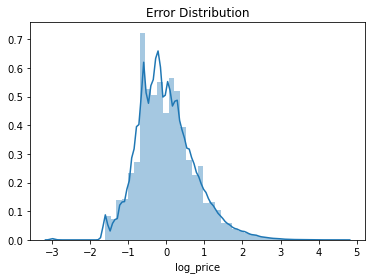

In [106]:
plt.title('Error Distribution');
sns.distplot(y_test - y_predict);
plt.show()

As we can see, 

- The RMSLE value for the base line model is 0.749936.
- And the spread is in between -3 to 5.

So we have to build model which is better than the base line model. We have to plot this graph for each and every model, and try to decrease the spread of the distribution.

In [109]:
with open('X_train_final.pickle','wb') as f:
    pickle.dump(X_train,f)
    
with open('X_test_final.pickle','wb') as f:
    pickle.dump(X_test,f)

### Detailed Summary on EDA and FE